This notebook presents an example of using pattern classification with fMRI data to decode the class of a stimulus

In [1]:
# load the necessary libraries

import os
import nibabel,numpy
import sklearn.svm
import nilearn.input_data
import nilearn.plotting

%matplotlib inline

In [2]:
# load the data
# contrast 1: faces_target_ons
# contrast 11: scene_target_ons
# contrast 21: char_target_ons

m=nilearn.input_data.NiftiMasker(mask_img='nback_mask.nii.gz')
data=m.fit_transform('nback_zstats1-11-21_all.nii.gz')

# create conditions indicator: 0=faces, 1=scenes, 2=characters
conditions=numpy.zeros(data.shape[0])
conditions[15:30]=1
conditions[30:]=2

# create sessions indicator
# since we will do cross-validation using leave-one-session-out
sessions=numpy.kron(numpy.ones(3),numpy.arange(15))


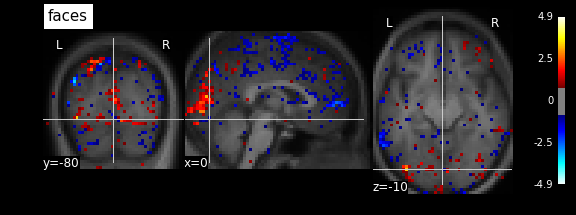

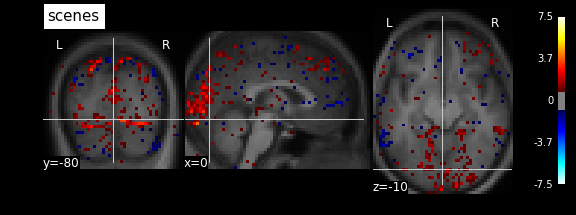

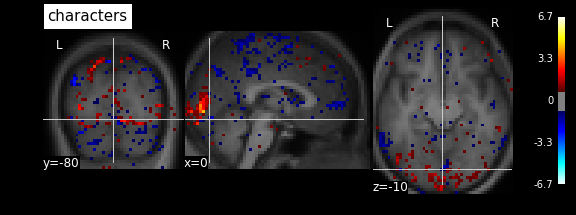

In [3]:
# show mean images
anat_img=nibabel.load('TRIO_Y_NDC_333_fsl.nii.gz')
faces_img=nibabel.load('nback_zstat1_mean.nii.gz')
thresh=0.8
coords=(0,-80,-10)
nilearn.plotting.plot_stat_map(faces_img,bg_img=anat_img,threshold=thresh,title='faces',cut_coords=coords)
scenes_img=nibabel.load('nback_zstat11_mean.nii.gz')
nilearn.plotting.plot_stat_map(scenes_img,bg_img=anat_img,threshold=thresh,title='scenes',cut_coords=coords)
chars_img=nibabel.load('nback_zstat21_mean.nii.gz')
nilearn.plotting.plot_stat_map(chars_img,bg_img=anat_img,threshold=thresh,title='characters',cut_coords=coords)

In [4]:
# perform classification analysis
# using leave-one-session-out cross validation

def run_classifier(shuffle_labels=False,verbose=True):
    # first create a variable to hold the accuracy results
    acc=numpy.zeros((15,3))

    # loop through leaving out each session and training on the rest
    for i in range(15):
            train_obs=sessions!=i
            test_obs=sessions==i
            train_X=data[train_obs,:]
            test_X=data[test_obs,:]
            train_Y=conditions[train_obs]
            if shuffle_labels:
                numpy.random.shuffle(train_Y)
            test_Y=conditions[test_obs]
            clf=sklearn.svm.SVC(kernel='linear')
            clf.fit(train_X,train_Y)
            pred=clf.predict(test_X)
            acc[i,:]=pred==test_Y
            train_acc=clf.predict(train_X)==train_Y
            if verbose:
                print('Session %d'%i)
                print('Training accuracy:',numpy.mean(train_acc))
                print('Test accuracy:',numpy.mean(acc[i,:]))
    return acc

acc=run_classifier()
meanacc=numpy.mean(acc,0)
print('')
print('Mean accuracy: %0.3f'%numpy.mean(acc))
print('Faces: %0.3f'%meanacc[0])
print('Scenes: %0.3f'%meanacc[1])
print('Characters: %0.3f'%meanacc[2])




Session 0
Training accuracy: 1.0
Test accuracy: 0.333333333333
Session 1
Training accuracy: 1.0
Test accuracy: 1.0
Session 2
Training accuracy: 1.0
Test accuracy: 0.666666666667
Session 3
Training accuracy: 1.0
Test accuracy: 0.666666666667
Session 4
Training accuracy: 1.0
Test accuracy: 1.0
Session 5
Training accuracy: 1.0
Test accuracy: 0.333333333333
Session 6
Training accuracy: 1.0
Test accuracy: 0.666666666667
Session 7
Training accuracy: 1.0
Test accuracy: 0.666666666667
Session 8
Training accuracy: 1.0
Test accuracy: 1.0
Session 9
Training accuracy: 1.0
Test accuracy: 0.666666666667
Session 10
Training accuracy: 1.0
Test accuracy: 0.666666666667
Session 11
Training accuracy: 1.0
Test accuracy: 0.666666666667
Session 12
Training accuracy: 1.0
Test accuracy: 0.666666666667
Session 13
Training accuracy: 1.0
Test accuracy: 0.333333333333
Session 14
Training accuracy: 1.0
Test accuracy: 0.666666666667

Mean accuracy: 0.667
Faces: 0.667
Scenes: 0.733
Characters: 0.600


In [5]:
acc=run_classifier(shuffle_labels=True,verbose=False)
meanacc=numpy.mean(acc,0)
print('Shuffled labels')
print('Mean accuracy: %0.3f'%numpy.mean(acc))
print('Faces: %0.3f'%meanacc[0])
print('Scenes: %0.3f'%meanacc[1])
print('Characters: %0.3f'%meanacc[2])





Shuffled labels
Mean accuracy: 0.289
Faces: 0.400
Scenes: 0.333
Characters: 0.133
